# Coursera Capstone Project Report

## A. Introduction

### Business problem-
### **_Opening of an Indian restaurant in the city of Edmonton, Alberta, Canada._**
### Background - 
#### Canada is a nation of newcomers.
During the last 60 years, immigration has continued to flourish, with newcomers arriving from every corner of the globe. Due to this, it has also earned the distinct name, 'The Mosiac'. Diversity within Canada continues to evolve and become more complex and varied with each province owning particular 'flavor' of diversity. British Columbia is more heavily Asian, Ontario has the greatest diversity, Alberta has overtaken Quebec both in numbers and diversity, and Quebec reflects the preference for French-speaking immigrants. The diversity of Canada’s population is expected to increase significantly in the next two decades, especially in the large metropolitan cities. Statistics Canada projects by 2031, between 25 to 28 percent of the population will be foreign-born and 29 to 32 percent of the population will belong to a visible minority group. Visible minorities are expected to account for 63 percent of the population of Toronto, 59 percent of Vancouver and 31 percent of Montreal.
#### Idea of opening 'Indian' Restaurant-
According to cicnews.com ('https://www.cicnews.com/2020/02/a-quarter-of-canadas-immigrants-arrived-from-india-in-2019-0213700.html#gs.noe0d8'), India was by far the main source country of new immigrants to Canada in 2019. China was the second leading source country, followed by the Philippines, Nigeria, the United States, Pakistan, Syria, Eritrea, South Korea, and Iran.
#### Idea of opening restaurant in Edmonton, Alberta -¶
According to the demographics presented in the Wikipedia page, https://en.wikipedia.org/wiki/Indo-Canadians#Population_settlement, cities like Toronto, Vancouver, Montreal, Calgary, Edmonton, Abbotsford etc have large Asian Indian population.
#### So, opening an Indian Restaurant will be a profitable idea in any of these cities.

# B. Data acquisition and Cleaning

## 2.1 Data sources


### To have the complete knowledge of the area of Edmonton, where we are going to open the Indian Restaurant, data about the follwing will be required-
+ Geographical coordinates of Alberta(using Nominatim)
+Longitude and Latitude values of all the neighbourhoods of the borough Edmonton (source  'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:\_T')
+ Data about the neighbourhood having the largest percentage of Asian Indian population out of all the neighbourhoods(source - https://citymuseumedmonton.ca/2016/11/22/edmontons-south-asian-community/)
+ Information about all the Indian Restaurants in that neighbourhood (using foursquare app)
+ Getting the ratings of all the venues returned (Using the Foursquare App) 
+ Getting the tips of the different rated venues(Using the Foursquare App) 
+ After selecting the possible spots to open the restaurant based on the other nearby restaurants, we will explore the popular areas near those spots further by using Fourquare App.
+ After aquiring all the above mentioned data, we will be able to decide the most suitable location to open the Indian Restaurant.

## 2.2 Data cleaning

First of all, data about the Postal codes of Alberta, Canada was downloaded from the page 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:\_T', where 'T' is for the province Alberta. The data contains information about the postal codes of all the boroughs and neighborhoods of Alberta along with there longitude and latitude values. The data was cleaned in the follwing way-

Firstly, there were boroughs, neighborhoods and latitude, longitude values which were 'not assigned'. Those rows, having the missing values were dropped from the table. 

Secondly,there were also some rows which had the same postal code values, those rows were joined, with the neighborhoods separated with the comma. 

Thirdly,the datatypes of all the columns were checked and the Longitude and Latitude dtypes were changed from 'object' to the 'numeric' data types for further investigation. The final dataset had 138 rows and 5 columns.

Since we are interested particularly in Edmonton, the datatable was further cleaned and only the rows with 'Edmonton' as borough were selected and converted into a new data table.The shape of the Edmonton data table had 38 rows and 5 columns.
The neighborhoods were visualized on a map using Folium library.

Next, all the data about exploring the Indian restaurants, their ratings, tips, nearby venues etc. were extracted using 'Foursquare App'

# C. Methodology

### Idea of opening restaurant in Edmonton, Alberta - 
From the demographics presented in the Wikipedia page, https://en.wikipedia.org/wiki/Indo-Canadians#Population_settlement, which shows the data about percentage of Indian population in various cities of different provinces, a bar graph was plotted. It was inferred from the graph that opening an India restaurant in the cities like Toronto(Ontario), Vancouver(British Columbia), Abbotsford(British Columbia), Calgary(Alberta) or Edmonton(Alberta) will be profitable.

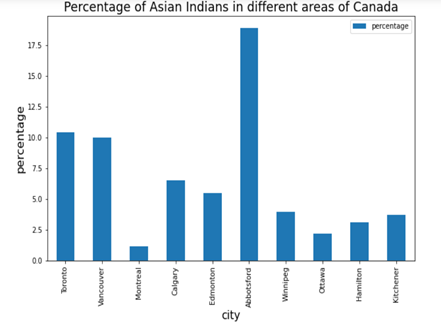

### Data-

|City	   | Province	      | Indian	| Percentage|
|----------|------------------|---------|---------|
|Toronto	   | Ontario	      | 643,370	| 10.4%|
|Vancouver  | British Columbia |	243,135 | 10.0%|
|Montréal   | Quebec	          |  48,485	|  1.2%|
|Calgary	   | Alberta	      |  90,625	|  6.5%|
|Edmonton   | Alberta	      |  72,245	|  5.5%|
|Abbotsford | British Columbia |	 33,340	| 18.9%|
|Winnipeg   | Manitoba	      |  30,800	|  4.0%|
|Ottawa	   | Ontario	      |  28,945	|  2.2%|
|Hamilton   | Ontario          |	 23,390	|  3.1%|
|Kitchener  | Ontario	      |  19,295	|  3.7%|



So, opening an Indian Restaurant will be a profitable idea in any of these cities.

A map of Alberta with neighborhoods superimposed on the top was plotted using Folium library to have an idea about the vicinity of each. Since we were interested particulary in Edmonton, Alberta, another map was plotted depicting the neighborhoods of only Edmonton.

Now we needed to select the neighborhood where most of the Indians reside which was checked from https://citymuseumedmonton.ca/2016/11/22/edmontons-south-asian-community/
It was seen that the neighborhood 'Mill Woods' is the place where most of the Indian population is living. The data containing 'Mill Woods' as the string in the neighborhood column was fetched from the Edmonton datatable and two rows with 'East Mill Woods' and 'West Mill Woods' was returned. 

So the Foursquare App was used to check the Indian restaurants within 2500 m radius of both the East and West Mill Woods using the url - 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT) and sending the GET requests, examining the relevant part of json and converting into a clean dataframe. The resulting dataframe returned 13 venues which were common to both East and West Mill Woods. From this it was inferred that both East and West Mill Woods are loacted within 2500m radius of each other and have common Indian restaurants.

Next step was to Get the ratings of all the venues returned (Using the Foursquare App) using the url- 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION) result = requests.get(url).json() try: print(result['response']['venue']['rating']) except: print('This venue has not been rated yet.'). Surprisingly, not even a single restaurant out of all it rated yet, which was thought to be a good news for us, because it clearly indicates that no Indian restaurant is a big investment there. 

Next, the area was further explored for other popular spots nearby by using Fourquare App, url - 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT) and sending the GET requests, examining the relevant part of json and converting into a clean dataframe.It returned 45 spots nearby. The resulting dataframe was grouped by category to know the total number of venues of each category. The prominent ones were Fast Food restaurants,  coffee shops, pizza places and banks, which are mostly food spots.

Finally, the following map of these venues with pop-ups on the top of Mill Woods map was made.

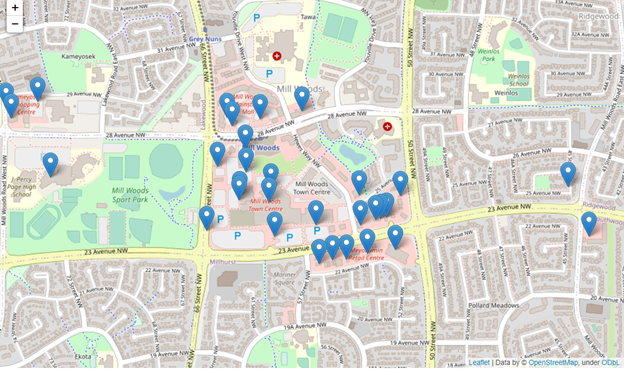




From the map it can be seen that most of these popular venues are clustered around the Mill Woods Town Centre. There are coffee shops, fast food restaurants, sanswich place near the banks, library and fitness centre, but no Indian restaurant is nearby. So, that area will be best suited for opening the restaurant.



## Results-
+ Percentage of Asian Indian population in Edmonton, Alberta is around 5.5%
+ Most of the Indian population resides in the Mill Woods area of Edmonton
+ No indian restaurant within 2500 meters of Mil Woods is rated yet.
+ There are coffee shops, fast food restaurants as well as pizza places in the Mill Woods Town Centre but no Indian Restaurant in that area.

## Discussion-

The Indian population in the cities like Edmonton, calgary, Toronto, Vancouver, Abbotsford etc. is increasing and is expected to increase in the next few decades. The neighborhoods of Edmonton, particularly, Mill Woods, has significant number of Indian people living there. As the Indian population in that area will grow in the future, there will be more people working, more Indian families growing. The Indian culture(cuisine, since we are more interested in that) will also become popular among people of other communities too. All these will lead to demand of more Indian Restaurants around that area. Since there are poeple of many other communties too living there, an Indian restaurant with high quality food and services will attract the people working around that area more. From the map it can be seen that most of the trending food spots are located around the Mill Woods Town Centre, which will be ever trending popular area. there is still no Indian Restaurant around but only the other fast food restaurants. So there will be no other Indian Restaurant for competition. 

## Conclusion-
From the data on Indian population in Edmonton - Mill Woods, ratings of different Indian Restaurants and trending venues, it can be seen that opening of Indian Restaurant in the area near the Mill Woods Town Centre, Mill Woods, Edmonton will be a Profitable business.